In [171]:
%matplotlib inline
import numpy as np
from sklearn.datasets import make_classification as mc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.animation as animation

In [2]:
def plot_svm_decision_boundary(x, y, svm):
    h = 0.02
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.subplot(1, 1, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    for e in svm.support_vectors_:
        plt.gcf().gca().add_artist(plt.Circle((e[0], e[1]), 0.1, color='y', fill=False))
    
    # Plot also the training points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())


2 100


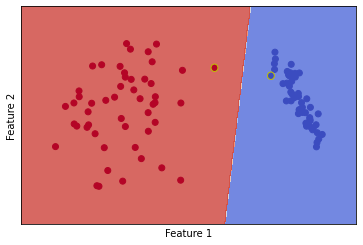

In [3]:
# Linear kernel - clear class separation
np.random.seed(10)

x, y = mc(class_sep=2.5, n_clusters_per_class=1, n_features=2, n_informative=2, n_redundant=0)

svm = SVC(kernel='linear', C=1).fit(x, y)

plot_svm_decision_boundary(x, y, svm)

print(len(svm.support_vectors_), len(x))

In the above case, the two classes are clearly separated. Thus, a hard-margin SVM is can be computed since the classes are linearly separable. We simulate a hard-margin SVM by setting the parameter $C$ to be very low. Additionally, intuitively in such a well-separated setting, we should be able to find the maximum-margin hyperplane using just 2 points - the 2 points closest to each other in each class. We see that when we train the SVM, we do indeed only land up with 2 support vectors.

100 100


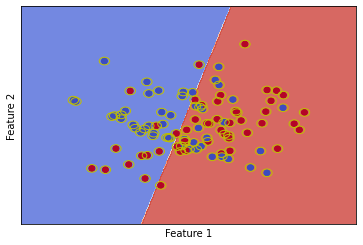

In [42]:
# Linear kernel - no class separation, low C
np.random.seed(14) # 14 originally

x, y = mc(class_sep=0.5, n_clusters_per_class=2, n_features=2, n_informative=2, n_redundant=0)

svm = SVC(kernel='linear', C=0.0001).fit(x, y)

plot_svm_decision_boundary(x, y, svm)

print(len(svm.support_vectors_), len(x))

The above image is the resulting of attempting to compute a hard-margin linear SVM on data that is linearly-nonseparable. Hard-margin SVMs are not defined in such settings, since there is no allowance for some misclassification to occur. As such, this results in every sample of the dataset being a support vector in order to try find a separating hyperplane. Further, this hyperplane is clearly a poor decision boundary for the distribution of this data.

80 100


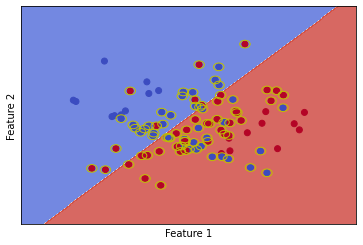

In [43]:
# Linear kernel - no class separation, high C
np.random.seed(14)

x, y = mc(class_sep=0.5, n_clusters_per_class=2, n_features=2, n_informative=2, n_redundant=0)

svm = SVC(kernel='linear', C=10).fit(x, y)

plot_svm_decision_boundary(x, y, svm)

print(len(svm.support_vectors_), len(x))

100 100


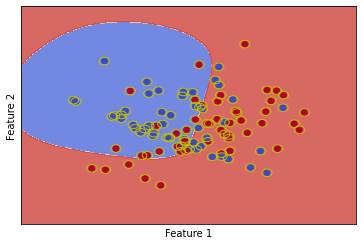

In [44]:
# Non-linear kernel - no class separation, low C (hard margin)
np.random.seed(14)

x, y = mc(class_sep=0.5, n_clusters_per_class=2, n_features=2, n_informative=2, n_redundant=0)

svm = SVC(kernel='rbf', C=0.000001).fit(x, y)

plot_svm_decision_boundary(x, y, svm)

print(len(svm.support_vectors_), len(x))

59 100


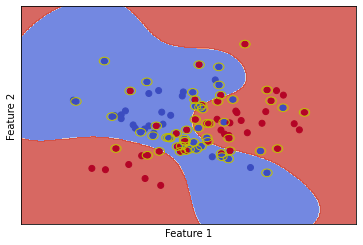

In [45]:
# Non-linear kernel - no class separation, high C (soft margin)
np.random.seed(14)

x, y = mc(class_sep=0.5, n_clusters_per_class=2, n_features=2, n_informative=2, n_redundant=0)

svm = SVC(kernel='rbf', C=10).fit(x, y)

plot_svm_decision_boundary(x, y, svm)

print(len(svm.support_vectors_), len(x))

In [72]:
def make_ds():
    x, y = mc(class_sep=0.5, n_clusters_per_class=2, n_features=2, n_informative=2, n_redundant=0)
    return {'data': x, 'target': y}

In [83]:
ds = [make_ds] * 100
sss = []
ess = []
for d in ds:
    data = d()
    x = data['data']
    y = data['target']
    
    ss = []
    es = []
    for i in range(10):
        xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.2)
        mms = MinMaxScaler().fit(xtr)
        xtr = mms.transform(xtr)
        xte = mms.transform(xte)
        
        svm = SVC(kernel='rbf').fit(xtr, ytr)
        score = svm.score(xte, yte)
        eta = len(svm.support_vectors_) / len(xtr)
        
        ss.append(score)
        es.append(eta)
    sss.append(ss)
    ess.append(es)
sss = np.array(sss)
ess = np.array(ess)


In [84]:
s = sss.mean(1)
e = ess.mean(1)

In [85]:
s

array([0.715, 0.705, 0.82 , 0.755, 0.665, 0.82 , 0.775, 0.785, 0.775,
       0.82 , 0.84 , 0.795, 0.835, 0.885, 0.825, 0.765, 0.655, 0.885,
       0.845, 0.84 , 0.92 , 0.85 , 0.665, 0.755, 0.725, 0.89 , 0.835,
       0.785, 0.79 , 0.885, 0.74 , 0.845, 0.875, 0.78 , 0.765, 0.74 ,
       0.73 , 0.815, 0.88 , 0.725, 0.76 , 0.81 , 0.79 , 0.785, 0.75 ,
       0.925, 0.83 , 0.8  , 0.83 , 0.715, 0.835, 0.685, 0.82 , 0.87 ,
       0.815, 0.67 , 0.725, 0.875, 0.865, 0.765, 0.865, 0.845, 0.64 ,
       0.885, 0.765, 0.745, 0.815, 0.89 , 0.775, 0.67 , 0.805, 0.815,
       0.825, 0.875, 0.655, 0.84 , 0.82 , 0.825, 0.84 , 0.71 , 0.69 ,
       0.755, 0.585, 0.86 , 0.78 , 0.88 , 0.705, 0.93 , 0.71 , 0.75 ,
       0.805, 0.855, 0.775, 0.86 , 0.755, 0.825, 0.825, 0.725, 0.815,
       0.735])

In [86]:
e

array([0.75625, 0.64125, 0.5225 , 0.61125, 0.7325 , 0.5825 , 0.68125,
       0.7175 , 0.62375, 0.54625, 0.5925 , 0.54625, 0.51875, 0.55   ,
       0.49   , 0.61125, 0.74   , 0.53375, 0.53   , 0.63375, 0.385  ,
       0.59875, 0.76125, 0.62875, 0.68875, 0.47875, 0.655  , 0.6925 ,
       0.62   , 0.5425 , 0.72   , 0.49375, 0.445  , 0.6775 , 0.68875,
       0.69   , 0.69   , 0.5225 , 0.39625, 0.725  , 0.665  , 0.5425 ,
       0.61   , 0.595  , 0.74625, 0.46375, 0.46625, 0.62875, 0.62375,
       0.7225 , 0.6375 , 0.71875, 0.54   , 0.6175 , 0.52875, 0.7425 ,
       0.65625, 0.4925 , 0.555  , 0.57625, 0.52625, 0.605  , 0.69   ,
       0.575  , 0.605  , 0.6425 , 0.47875, 0.56125, 0.62125, 0.74625,
       0.56   , 0.6    , 0.55625, 0.48625, 0.65   , 0.545  , 0.5775 ,
       0.58375, 0.52875, 0.785  , 0.71875, 0.59875, 0.75375, 0.47625,
       0.59875, 0.49625, 0.62625, 0.43375, 0.6925 , 0.6625 , 0.625  ,
       0.46375, 0.63625, 0.535  , 0.5825 , 0.5875 , 0.5225 , 0.66875,
       0.48125, 0.64

Text(0, 0.5, 'Test Accuracy')

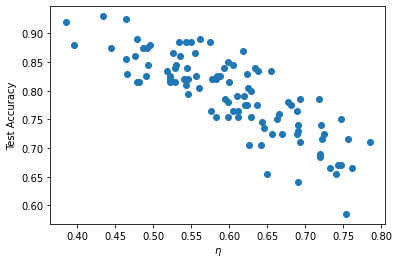

In [92]:
plt.scatter(e, s)
plt.xlabel(r'$\eta$')
plt.ylabel('Test Accuracy')

In [286]:
x1 = np.random.normal(0, 0.5, (100,))
y1 = np.array([-1] * 100)
x2 = np.hstack((np.random.normal(-3, 0.5, (100,)), np.random.normal(3, 0.5, (100,))))
y2 = np.array([1] * 200)
x = np.hstack((x1, x2))
y = np.hstack((y1, y2))

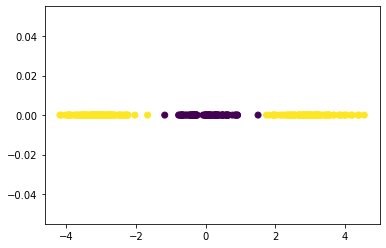

In [287]:
%matplotlib inline
plt.figure()
plt.scatter(x, [0] * len(x), c=y)

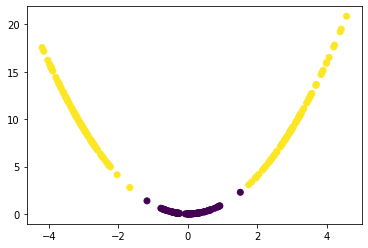

In [288]:
plt.figure()
plt.scatter(x, x ** 2, c=y)

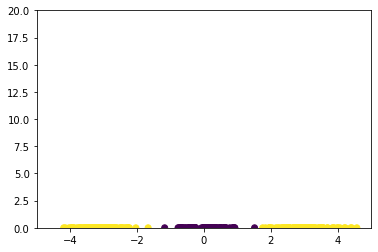

In [289]:
%matplotlib inline

fig = plt.figure()
plt.xlim(-5, 5)
plt.ylim(0, 20)
yy = np.array([0] * len(x))
scat = plt.scatter(x, yy, c=y)

def animate(i):
    yy[i] = x[i] ** 2
    scat.set_offsets(np.stack((x, yy)).T)
    return scat

ani = animation.FuncAnimation(fig, animate, frames=len(x), interval=50)
plt.show()

In [ ]:
ani.save("movie.mp4")

In [215]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1